# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**



# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [96]:
# Your code to crawl and generate the csv, and save it to variable create_df
#import pandas as pd
#create_df = pd.DataFrame()
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
url =  'https://scholar.google.com/citations?user=dqwjm-0AAAAJ'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

years = list(map(int, [i.text for i in soup.find_all('span', {'class':'gsc_g_t'})]))
citations = list(map(int, [i.text for i in soup.find_all('span', {'class':'gsc_g_al'})]))

create_df = pd.DataFrame({'Year': years, 'Citation': citations})
create_df.to_csv('/content/drive/My Drive/Citation2003-2021.csv', index=False)
create_df

,Year,Citation
0,2003,15
1,2004,34
2,2005,17
3,2006,11
4,2007,33
5,2008,41
6,2009,57
7,2010,68
8,2011,105
9,2012,131


## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [88]:
!pip install "statsmodels==0.11.1"

In [97]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
# data ="/content/drive/My Drive/Citation2003-2021.csv"
#training_data_2003_2017 = create_df.query("2003 <= year <= 2017")["Citation"]
#model = ARIMA(training_data_2003_2017, order=(1,1,1))

series = read_csv(data, header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')

train, test = X[0:15], X[15:18]
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.512
Date:                Sun, 23 May 2021   AIC                            131.024
Time:                        13:50:57   BIC                            132.941
Sample:                             0   HQIC                           130.846
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9480      0.254      3.737      0.000       0.451       1.445
ma.L1         -0.4727      0.697     -0.678      0.498      -1.839       0.894
sigma2       401.7334    157.222      2.555      0.011      93.584     709.882
===================================================================================
Ljung-Box (Q):                       11.90   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.54   Prob(JB):                         0.71
Heteroskedasticity (H):               1.84   Skew:                             0.42
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well

In [98]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

history = [x for x in train]
predictions = list()
confidence_interval = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.get_forecast()
    yhat = output.predicted_mean
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    ci = output.conf_int(0.05)
    confidence_interval.append(ci[0])
    print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))


# Your code to show the performance RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=427.299935, expected=452.000000
95% Interval: 388.016 to 466.584
predicted=505.181945, expected=583.000000
95% Interval: 465.751 to 544.613
predicted=682.932554, expected=842.000000
95% Interval: 629.859 to 736.006
Test RMSE: 103.228


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

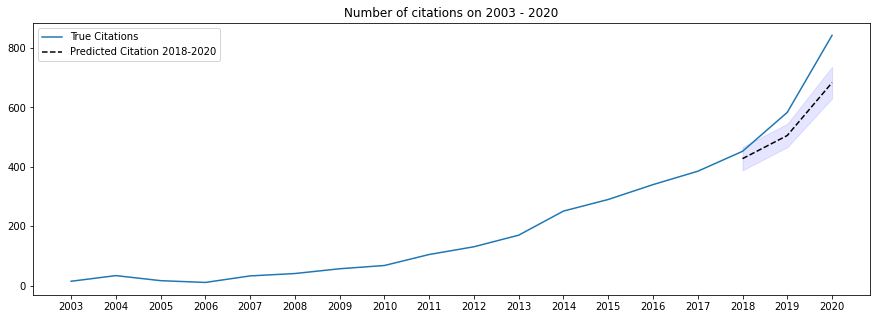

In [99]:
# You code: Visualize as required, the prediction with its confidence interval
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(15, 5))

ax.plot(range(2003, 2021), create_df.Citation.values[:-1], label="True Citations")

ax.plot(range(2018, 2021), predictions, 'k--', label="Predicted Citation 2018-2020")
ax.fill_between(
    range(2018, 2021),np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1], alpha=0.1, color='b')

ax.set_xticks(range(2003, 2021))
ax.set_title("Number of citations on 2003 - 2020")
plt.legend()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [100]:
# your code to run grid search
#p = list(range(1,3))
#q = list(range(1,3))
#d = list(range(1,3))
#RMSE = []
#PARAMETER = []
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

data ="/content/drive/My Drive/Citation2003-2021.csv"

series = read_csv(data, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
X = X.astype('float32')

train, test = X[0:15], X[15:18]
history = [x for x in train]
predictions = list()
RMSE = []
PARAMETER = []
p=[1,2]
q=[1,2]
d=[1,2]

# walk-forward validation
for i1 in p:
  for i2 in q:
    for i3 in d:
      for t in range(len(test)):
	      model = ARIMA(history, order=(i1,i3,i2))
	      model_fit = model.fit()
	      output = model_fit.forecast()
	      yhat = output[0]
	      predictions.append(yhat)
	      obs = test[t]
	      history.append(obs)
	      #print('predicted=%f, expected=%f' % (yhat, obs))  
      rmse = sqrt(mean_squared_error(test, predictions))
      history = [x for x in train]
      predictions = list()  
      RMSE.append(rmse)
      order = (i1,i2,i3)
      PARAMETER.append(order)
      print('Test RMSE: %.3f' % rmse,i1,i2,i3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 103.228 1 1 1
Test RMSE: 97.641 1 1 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 103.703 1 2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 94.379 1 2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 92.950 2 1 1
Test RMSE: 106.226 2 1 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 102.636 2 2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test RMSE: 104.280 2 2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [101]:
# your code to generate the seach-results.csv and print the top 6 rows
#Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
#Results.head(6)
Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
Results.to_csv('/content/drive/My Drive/Search-results.csv', index=False)
Results.head(6)

,RMSE,Parameter
0,103.228218,"(1, 1, 1)"
1,97.640804,"(1, 1, 2)"
2,103.702932,"(1, 2, 1)"
3,94.379288,"(1, 2, 2)"
4,92.949608,"(2, 1, 1)"
5,106.225676,"(2, 1, 2)"


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [102]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]


# Your code to predict for 2021 and 2022
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]
import numpy as np
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train = create_df.Citation.values[:-1]
history = [x for x in train]
prediction1 = list()
best_parameter = [2,1,1]

# Your code to predict for 2021 and 2022
model = ARIMA(history, order=(2,1,1))
model_fit = model.fit()
output = model_fit.get_forecast(2)
yhat = output.predicted_mean
confidence_interval2 = output.conf_int(0.05)

for i in range (len(yhat)):
     val = yhat[i]
     prediction1.append(yhat[i])
     print('predicted %.3f' % (val))
     ci= confidence_interval2[i]
     print('95%% Interval: %.3f to %.3f' % (ci[0], ci[1]))



predicted 1151.503
95% Interval: 1075.843 to 1227.163
predicted 1477.645
95% Interval: 1280.076 to 1675.213


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

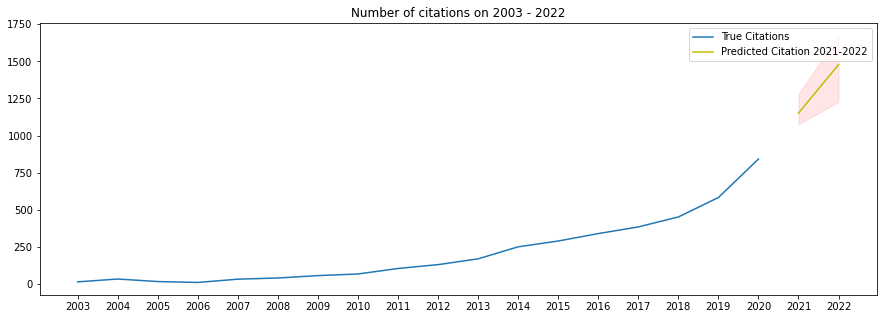

In [103]:
# Plot the points and the prediction with its confidence interval

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(15, 5))

ax.plot(range(2003, 2021), create_df.Citation.values[:-1], label="True Citations")

ax.plot(range(2021, 2023), prediction1, label="Predicted Citation 2021-2022", color='y')

ax.fill_between(
    range(2021, 2023),np.array(confidence_interval2)[0], np.array(confidence_interval2)[1], alpha=0.1, color='r')

ax.set_xticks(range(2003, 2023))
ax.set_title("Number of citations on 2003 - 2022")
plt.legend()